# Bernstein-Vazirani Algorithm <br>
   


Suppose you have a n-bit sekret number s, so we design an oracle to determine that in one shot (think about how many shots a classical computer would need) <br>

Basic math that's working in the back:
   <br>
   $H^{\otimes n} |0\rangle^{\otimes n} = 1/2^{n/2}\sum_{x \in {{0,1}}^{n}}|x\rangle$ <br>
   Now, let the oracle function be $f_{s}$,<br>
   Then note, <br>
   $f(1/2^{n/2}\sum_{x \in {0,1}^{n}}|x\rangle) = 1/2^{n/2}\sum_{x\in{0,1}^{n}} (-1)^{s.x}|x\rangle$ <br> - (i)
   Now recall, <br>
   $H^{\otimes n}|s\rangle = 1/2^{n/2}\sum_{x\in{0,1}^{n}} (-1)^{s.x}|x\rangle$  -(ii) <br>
   Since quantum logic is reversible, by (i) and (ii), we have, <br>
   $1/2^{n/2}\sum_{x\in{0,1}^{n}} (-1)^{s.x}|x\rangle = |a \rangle $ <br>
   where, s.x denotes the bitwise product of n bit strings s and x

In [1]:
from qiskit import *
%matplotlib inline

In [2]:
s = '1010'
s = s[::-1]

In [3]:
n  = len(s)

In [7]:
qc = QuantumCircuit(n+1,n)
#one extra bit for output
#note: by default all qubits are set in the state |0>
#note: in qiskit, q0 is the LSB and qn is the MSB
qc.h(range(n))
qc.x(n)
qc.h(n)
qc.barrier()

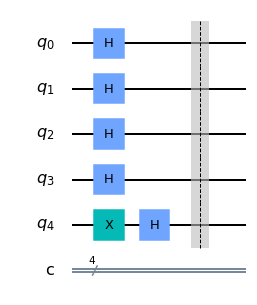

In [8]:
#circuit till now
qc.draw('mpl')

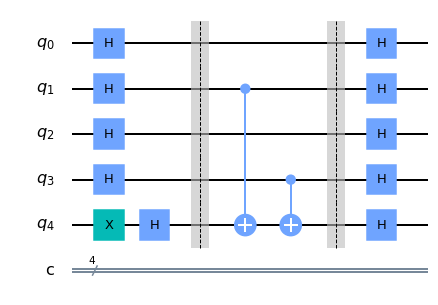

In [9]:
for i in range(n):
    if s[i] == '1':
        qc.cx(i,n)
qc.barrier()
qc.h(range(n+1))
qc.draw('mpl')
#note: the circuit b/w the two barriers is the oracle

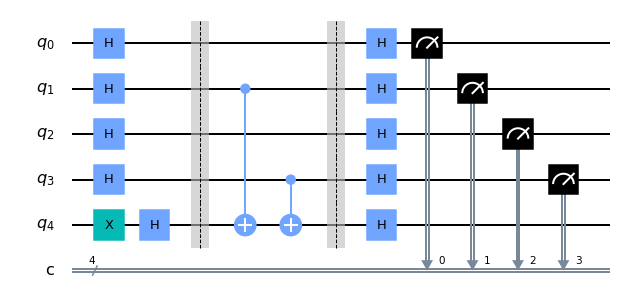

In [10]:
for i in range(n):
    qc.measure(i, i)
qc.draw('mpl')

In [16]:
#now, let us simulate
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1)
result = job.result()
count = result.get_counts()
print(count)

{'1010': 1}


et voilà! <br>
Notice, it does seem like that we inputted a bit string and got the same bit string out of it, but if you look at the circuit carefully, you'd see that, the n guesses a classical computer would perform to guess our 's', are performed in a parallel computation via using hadamard gates (read - QFT), so this algorithm is emphasising that! <br>